In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import datetime
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
Japan = pd.read_csv('Cleaned Data/Japan.csv')
China = pd.read_csv('Cleaned Data/China.csv')
Korea = pd.read_csv('Cleaned Data/Korea.csv')
Singapore = pd.read_csv('Cleaned Data/Singapore.CSV')
Malaysia = pd.read_csv('Cleaned Data/Malaysia.CSV')
Highincome = pd.read_csv('Cleaned Data/Highincome_DF.CSV')
UpperMidincome = pd.read_csv('Cleaned Data/UpperMidincome_DF.CSV')
Japan.set_index('Year', inplace = True) 
China.set_index('Year', inplace = True) 
Korea.set_index('Year', inplace = True)
Singapore.set_index('Year', inplace = True)
Malaysia.set_index('Year', inplace = True) 
Highincome.set_index('Year', inplace = True) 
UpperMidincome.set_index('Year', inplace = True) 

In [3]:
Japan.dropna(inplace = True)
China.dropna(inplace = True)
Korea.dropna(inplace = True)
Singapore.dropna(inplace = True)
Malaysia.dropna(inplace = True)
Highincome.dropna(inplace = True)
UpperMidincome.dropna(inplace = True)

In [10]:
def Test_Train(x):
    y = x['GDP'].pct_change().dropna()
    X = x[features].pct_change().dropna()
    y_train =  y[:45]
    y_test = y[45:]
    X_train =  X[:45]
    X_test =  X[45:]
    return (X_train, X_test, y_train, y_test)

,GNI,14 Under,15 to 64,64 Above,Female(%),Total pop,Life expectancy at birth,"Fertility rate, total (births per woman)",Pop Growth,Work Population(%),Death rate,Birth rate,Trade balance,Gov Exp,14 Population,15 to 64 Population,64 Above Population,Female Population,Male Population
Year,,,,,,,,,,,,,,,,,,,
1962,70.0,40.282471,56.043207,3.674322,48.508282,6.657700e+08,44.783,6.062,0.820456,78.433757,10.02,37.01,5.402551e+08,5.990326e+09,2.681886e+08,3.731189e+08,2.446254e+07,3.229536e+08,3.428164e+08
1963,80.0,40.807495,55.593322,3.599183,48.530508,6.823350e+08,45.972,6.206,2.457647,79.877719,10.04,43.37,5.808758e+08,6.863133e+09,2.784438e+08,3.793327e+08,2.455849e+07,3.311406e+08,3.511944e+08
1964,90.0,41.139201,55.348429,3.512369,48.552414,6.983550e+08,47.592,6.320,2.320683,80.673601,11.50,39.14,5.402551e+08,7.573698e+09,2.872977e+08,3.865285e+08,2.452881e+07,3.390682e+08,3.592868e+08
1965,100.0,41.178436,55.397809,3.423755,48.575045,7.151850e+08,49.549,6.385,2.381368,80.512555,9.50,37.88,3.168413e+08,8.302549e+09,2.945020e+08,3.961968e+08,2.448619e+07,3.474014e+08,3.677836e+08
1966,110.0,41.367519,55.141211,3.491270,48.598679,7.354000e+08,51.696,6.384,2.787332,81.352565,8.83,35.05,1.990414e+08,9.274877e+09,3.042167e+08,4.055085e+08,2.567480e+07,3.573947e+08,3.780053e+08
1967,100.0,41.213460,55.220928,3.565612,48.622292,7.545500e+08,53.847,6.316,2.570698,81.090763,8.43,33.96,2.193517e+08,7.948507e+09,3.109762e+08,4.166695e+08,2.690433e+07,3.668795e+08,3.876705e+08
1968,90.0,40.877596,55.483642,3.638762,48.644136,7.745100e+08,55.843,6.184,2.610903,80.233301,8.21,35.59,2.721586e+08,7.882915e+09,3.166011e+08,4.297264e+08,2.818258e+07,3.767537e+08,3.977563e+08
1969,110.0,40.580856,55.718981,3.700163,48.662127,7.960250e+08,57.603,5.986,2.740002,79.472056,8.03,34.11,5.118206e+08,9.356852e+09,3.230338e+08,4.435370e+08,2.945423e+07,3.873627e+08,4.086623e+08
1970,120.0,40.407222,55.844752,3.748027,48.675115,8.183150e+08,59.085,5.725,2.761676,79.067857,7.60,33.43,2.843448e+07,1.015094e+10,3.306584e+08,4.569860e+08,3.067066e+07,3.983158e+08,4.199992e+08


[Text(0.5, 1.0, 'China')]

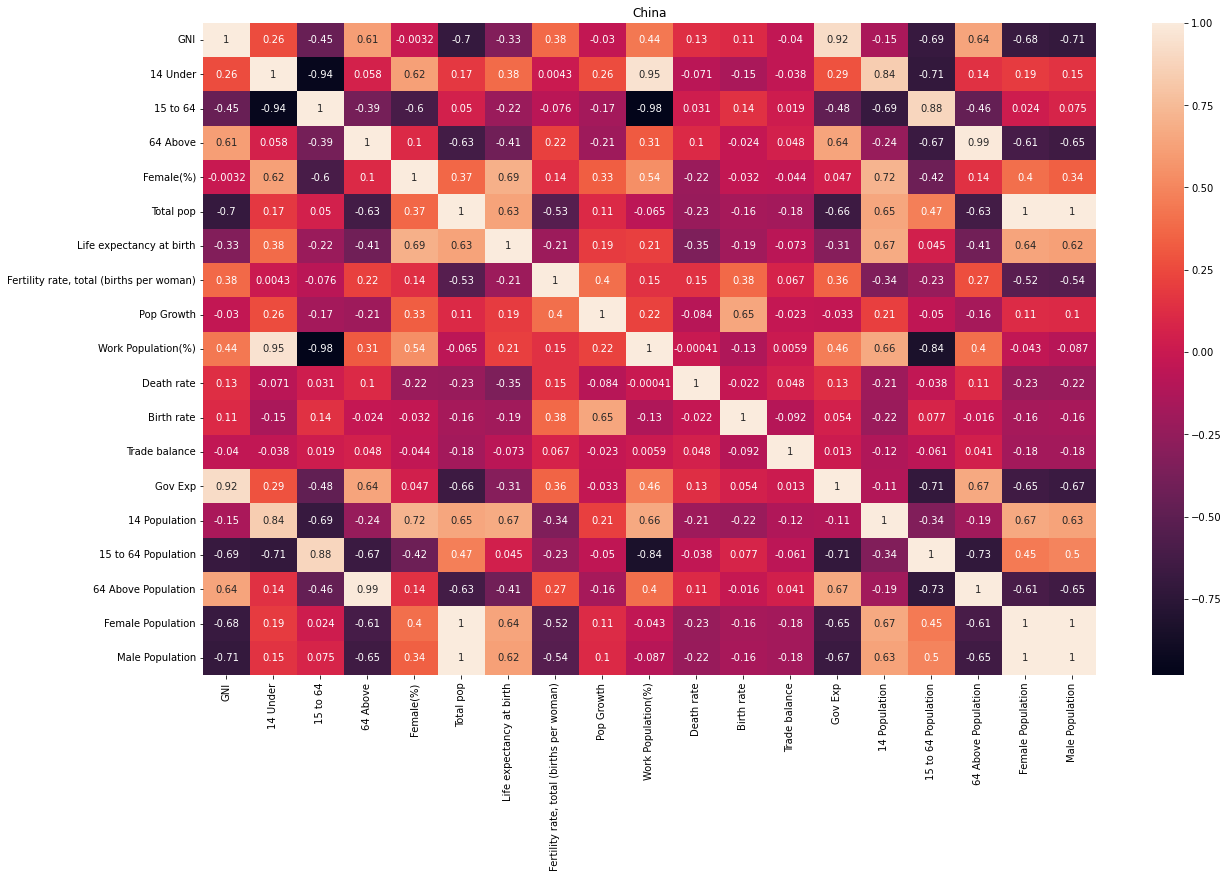

In [14]:
fig, ax = plt.subplots(1, figsize = (20, 12))
sns.heatmap(China.().corr(), annot = True).set(title='China')